📚 0 . importing Libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

📌 1. Load Data

In [53]:

df = pd.read_csv("../data/benin-malanville.csv", parse_dates=['Timestamp'])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


📌 2. Summary Stats & Missing Values

In [54]:
df.describe()
df.isnull().sum()
missing = df.isnull().mean() * 100
missing[missing > 5]  # Columns with >5% missing

Comments    100.0
dtype: float64

📌 3. Outlier Detection (Z-Score)

In [55]:
from scipy.stats import zscore

for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    df[f'{col}_zscore'] = zscore(df[col].fillna(df[col].median()))
    outliers = df[df[f'{col}_zscore'].abs() > 3]
    print(f"{col} outliers: {len(outliers)}")

GHI outliers: 89
DNI outliers: 0
DHI outliers: 3738
ModA outliers: 27
ModB outliers: 63
WS outliers: 3109
WSgust outliers: 3500


📌 4. Cleaning the Data

In [56]:
#Fixing the outliers

df = df[df['GHI_zscore'].abs() < 3]

Q1 = df['DHI'].quantile(0.25)
Q3 = df['DHI'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['DHI'] >= Q1 - 1.5 * IQR) & (df['DHI'] <= Q3 + 1.5 * IQR)]
df = df[df['ModA_zscore'].abs() < 3]
df = df[df['ModB_zscore'].abs() < 3]
df['WS'] = df['WS'].clip(lower=df['WS'].quantile(0.01), upper=df['WS'].quantile(0.99))
df['WSgust'] = df['WSgust'].clip(lower=df['WSgust'].quantile(0.01), upper=df['WSgust'].quantile(0.99))


In [57]:
df.drop(columns=['Comments'], inplace=True)

📌 5. Save Cleaned Data

In [58]:
df.to_csv("data/benin_clean.csv", index=True)


In [65]:
cleaned_data_path = "data/benin_clean.csv"
cleaned_data = pd.read_csv(cleaned_data_path, parse_dates=['Timestamp'])

cleaned_data.info()
cleaned_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516753 entries, 0 to 516752
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     516753 non-null  int64         
 1   Timestamp      516753 non-null  datetime64[ns]
 2   GHI            516753 non-null  float64       
 3   DNI            516753 non-null  float64       
 4   DHI            516753 non-null  float64       
 5   ModA           516753 non-null  float64       
 6   ModB           516753 non-null  float64       
 7   Tamb           516753 non-null  float64       
 8   RH             516753 non-null  float64       
 9   WS             516753 non-null  float64       
 10  WSgust         516753 non-null  float64       
 11  WSstdev        516753 non-null  float64       
 12  WD             516753 non-null  float64       
 13  WDstdev        516753 non-null  float64       
 14  BP             516753 non-null  int64         
 15  

,Unnamed: 0,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,...,Precipitation,TModA,TModB,GHI_zscore,DNI_zscore,DHI_zscore,ModA_zscore,ModB_zscore,WS_zscore,WSgust_zscore
0,0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,...,0.0,26.3,26.2,-0.730102,-0.639591,-0.733873,-0.723749,-0.723088,-1.322831,-1.187312
1,1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,...,0.0,26.3,26.2,-0.729800,-0.639591,-0.733873,-0.723749,-0.723088,-1.322831,-1.384442
2,2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,...,0.0,26.4,26.2,-0.729800,-0.639591,-0.733873,-0.723749,-0.723088,-1.135736,-0.842334
3,3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,...,0.0,26.4,26.3,-0.729800,-0.639209,-0.733243,-0.723749,-0.723088,-1.198101,-1.039464
4,4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,...,0.0,26.4,26.3,-0.729498,-0.639209,-0.733243,-0.723749,-0.723088,-1.260466,-1.039464


📈 Visualizing the Data in  EDA 


Text(0.5, 1.0, 'Time Series Plots for Benin Malanville')

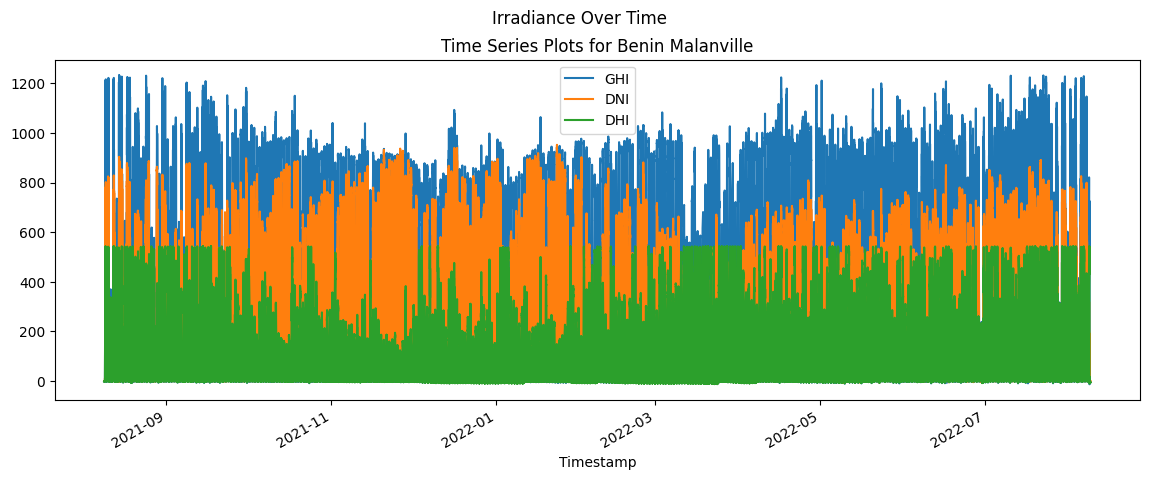

In [66]:

cleaned_data.set_index('Timestamp')[['GHI', 'DNI', 'DHI']].plot(figsize=(14,5))
plt.suptitle("Irradiance Over Time")
plt.title("Time Series Plots for Benin Malanville")


🔸 Cleaning Effect (Grouped)

<Axes: xlabel='Cleaning'>

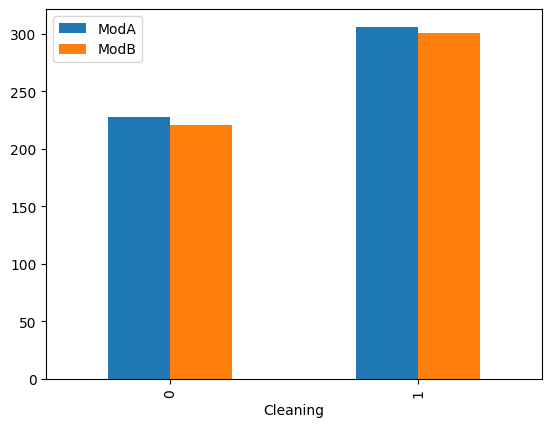

In [ ]:
cleaned_data.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')

🔸 Correlation Heatmap

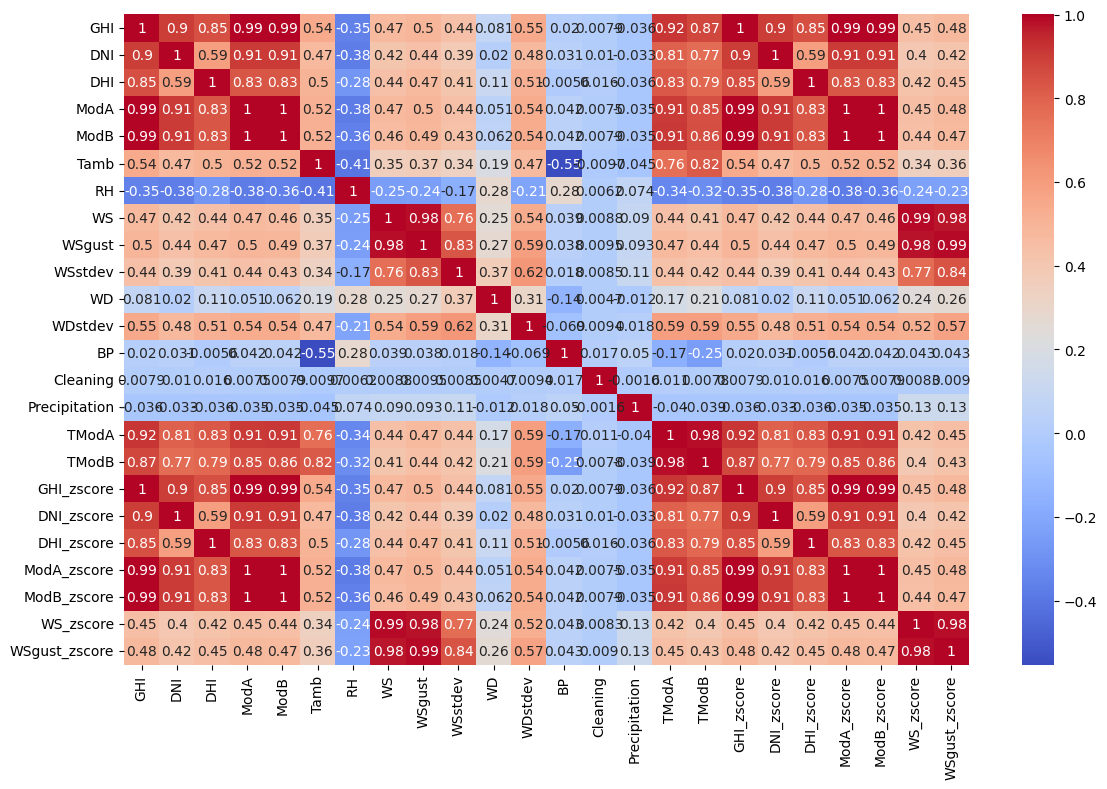

In [62]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.tight_layout() 
plt.show()

<Axes: xlabel='WS', ylabel='GHI'>

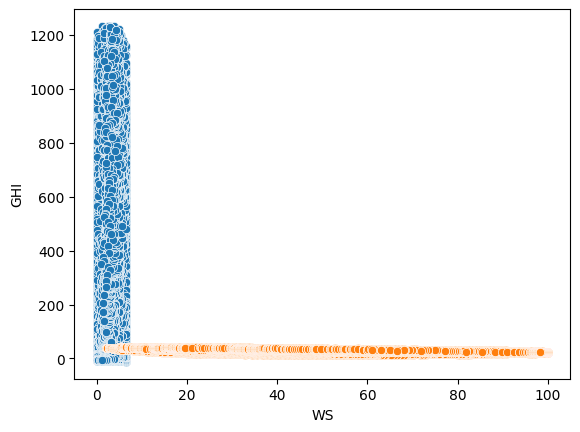

In [63]:
sns.scatterplot(x='WS', y='GHI', data=df)
sns.scatterplot(x='RH', y='Tamb', data=df)


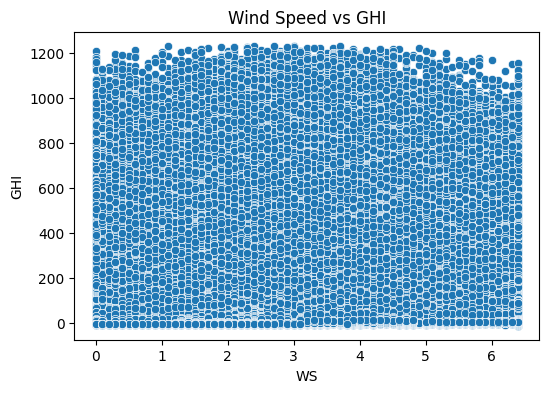

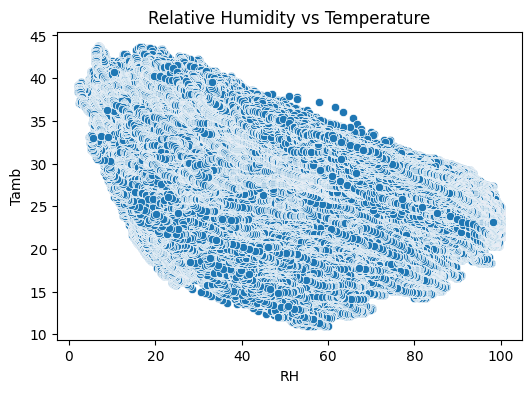

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1
plt.figure(figsize=(6, 4))
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title("Wind Speed vs GHI")
plt.show()

# Plot 2
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title("Relative Humidity vs Temperature")
plt.show()
